In [1]:
# Useful functions for Tanh activation function

import numpy as np
from scipy.integrate import quad

# Define the activation function for the neural network
def activation_function(x):
    return np.tanh(x) # Hyperbolic tangent function

# Derivative of the activation function
def activation_derivative(x):
    return 1 / np.cosh(x)**2  # derivative of tanh function

# Hessian of the activation function
def activation_hessian(x):
    return -2 * np.tanh(x) / np.cosh(x)**2  # second derivative of tanh function

# Define the MGF integrand function
def integrand(x, lam, k):
    return np.exp(lam * (activation_function(x * np.sqrt(k)))**2 - x**2 / 2) / np.sqrt(2 * np.pi)

# Define the integrand for the derivative of the MGF with respect to lambda
def integrand_derivative(x, lam, k):
    return activation_function(x * np.sqrt(k))**2 * np.exp(lam * (activation_function(x * np.sqrt(k)))**2 - x**2 / 2) / np.sqrt(2 * np.pi)

# Define the integrand for the hessian of the MGF
def integrand_hessian(x, mean, lam, k):
    return (activation_function(x * np.sqrt(k))**2 - mean)**2 * np.exp(lam * (activation_function(x * np.sqrt(k)))**2 - x**2 / 2) / np.sqrt(2 * np.pi)

# Define the integrand for the derivative of the MGF with respect to k
def integrand_derivative_k(x, lam, k):
    return activation_derivative(x * np.sqrt(k)) * activation_function(x * np.sqrt(k)) * x * np.exp(lam * (activation_function(x * np.sqrt(k)))**2 - x**2 / 2) / np.sqrt(2 * np.pi)

# Test the functions
def inte(x, lam = 1, k = 1):
    return integrand_derivative(x, lam, k)
result, error = quad(inte, -np.inf, np.inf, args=(-3, 1))
print(f"Value over R: {result}. Estimated error: {error}")

Value over R: 0.07802771830328178. Estimated error: 4.0008293339315417e-10


Total runtime for quadrature is 0.15021204948425293



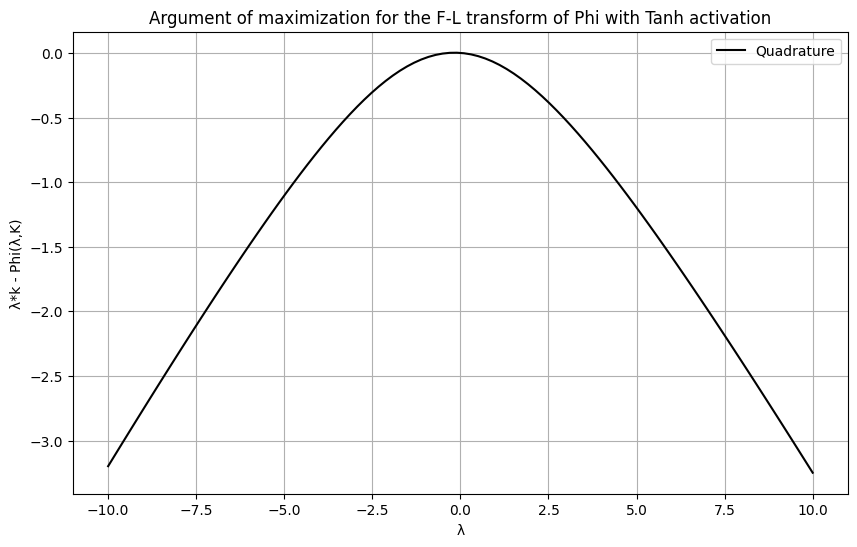

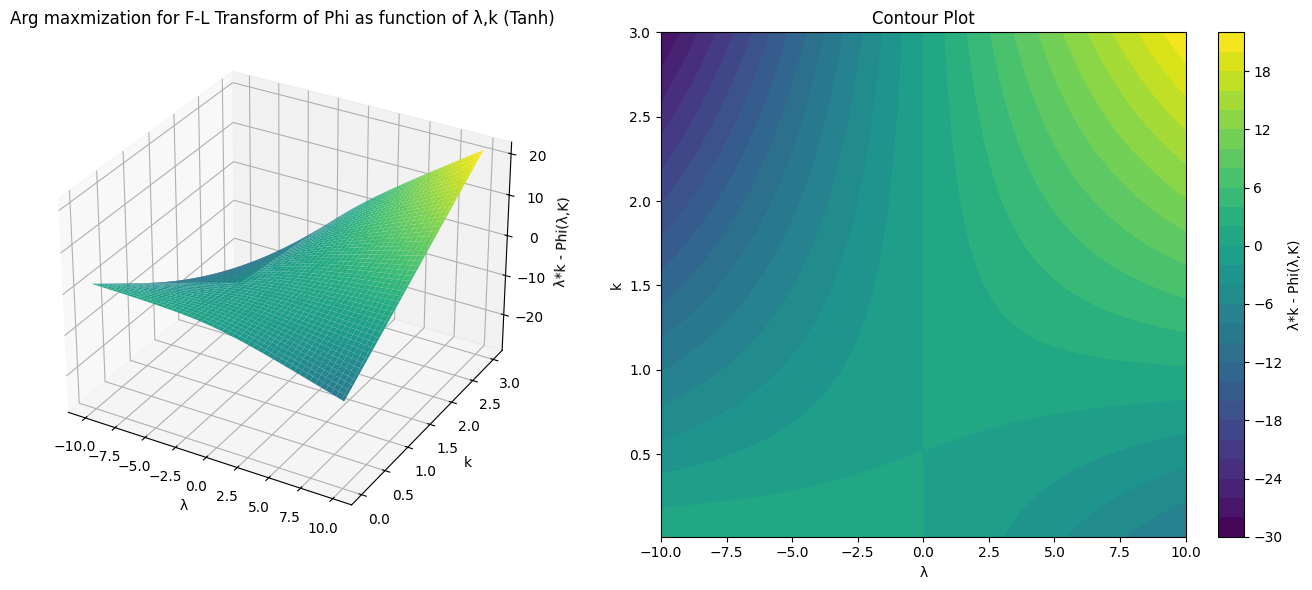

In [2]:
import numpy as np

# Define the LMGT (Phi)
def Phi(lam, k):
    def inte(x, lam = 1, k = 1):
        return integrand(x, lam, k)
    return np.log(quad(inte, -np.inf, np.inf, args = (lam, k))[0])

# Define the gradient of Phi with respect to lambda
def gradient_Phi_lam(lam, k):
    def inte(x, lam = 1, k = 1):
        return integrand(x, lam, k)
    def inte_der(x, lam = 1, k = 1):
        return integrand_derivative(x, lam, k)
    numerator = quad(inte_der, -np.inf, np.inf, args = (lam, k))[0]
    denominator = quad(inte, -np.inf, np.inf, args = (lam, k))[0]
    return numerator / denominator

# Define the gradient of Phi with respect to k
def gradient_Phi_k(lam, k):
    def inte(x, lam = 1, k = 1):
        return integrand(x, lam, k)
    def inte_der_k(x, lam = 1, k = 1):
        return integrand_derivative_k(x, lam, k)
    numerator = quad(inte_der_k, -np.inf, np.inf, args = (lam, k))[0]
    denominator = quad(inte, -np.inf, np.inf, args = (lam, k))[0]
    return lam * numerator / (denominator * np.sqrt(k))

# Define the hessian of Phi with respect to lambda
def hessian_Phi_lam(lam, k):
    def inte(x, lam = 1, k = 1):
        return integrand(x, lam, k)
    def inte_der(x, lam = 1, k = 1):
        return integrand_derivative(x, lam, k)
    def inte_hes(x, mean, lam = 1, k = 1):
        return integrand_hessian(x, mean, lam, k)
    mean = quad(inte_der, -5, 5 , args = (lam, k))[0]
    numerator = quad(inte_hes, -5, 5, args = (mean, lam, k))[0] 
    denominator = quad(inte, -5, 5, args = (lam, k))[0]
    return numerator / denominator

# Test the functions
import matplotlib.pyplot as plt
import time as tm
k_0 = 2
k_1 = 0.5
# Range of lambda values
lambda_values = np.linspace(-10, 10, 100)
# Compute the argument of maximization for the F-L transform of Phi using quadrature
start = tm.time()
results_q = [k_1 * lam - Phi(lam, k_0)  for lam in lambda_values]
end = tm.time()
print(f"Total runtime for quadrature is {end - start}\n")
# Plotting
plt.figure(figsize = (10, 6))
plt.plot(lambda_values, results_q, label = 'Quadrature', linestyle = '-', color = 'black')
plt.title(f'Argument of maximization for the F-L transform of Phi with Tanh activation')
plt.xlabel('λ')
plt.ylabel('λ*k - Phi(λ,K)')
plt.grid()
plt.legend()
#plt.savefig(f"argmaxFLtanh.pdf", format = "pdf")
plt.show()

# Grid points for 3D plot + contour plot
k_1_values = np.linspace(0.01, 3, 100)
LAM, K1 = np.meshgrid(lambda_values, k_1_values)
k_values = np.stack([LAM.ravel(), K1.ravel()], axis=1)
# Compute the argument of maximization for the F-L transform of Phi using quadrature
results = [k[1] * k[0] - Phi(k[0], k_0) for k in k_values]
results = np.array(results).reshape(LAM.shape)
# Plotting
fig = plt.figure(figsize = (14, 6))
# Plot 3D
ax1 = fig.add_subplot(1, 2, 1, projection = '3d')
ax1.plot_surface(LAM, K1, results, cmap = 'viridis', edgecolor = 'none')
ax1.set_title(f"Arg maxmization for F-L Transform of Phi as function of λ,k (Tanh)")
ax1.set_xlabel('λ')
ax1.set_ylabel('k')
ax1.set_zlabel('λ*k - Phi(λ,K)')
# Contour plot
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contourf(LAM, K1, results, levels = 30, cmap = 'viridis')
fig.colorbar(contour, ax = ax2, label = 'λ*k - Phi(λ,K)')
ax2.set_title(f"Contour Plot")
ax2.set_xlabel('λ')
ax2.set_ylabel('k')
plt.tight_layout()
#plt.savefig(f"argmaxFLtanh3D.pdf", format = "pdf")
plt.show()

In [3]:
# Numerical methods to compute the Fenchel-Legendre transform of Phi
# All the functions return the value of the function and the optimal point

# Scipy optimization
from scipy.optimize import minimize # if we want to maximize we can use the relation max f = -min(-f)
def Phi_conjugate_Scipy(k_1, k_0, starting_point = 1):
    def objective(lam):
            # Define the value and its derivative
            return -lam * k_1 + Phi(lam, k_0), -k_1 + gradient_Phi_lam(lam, k_0)
    # Use Scipy's minimize to find the optimal lam
    result = minimize(objective, x0 = starting_point, method = 'BFGS', jac = True, options={'disp': False})
    if not result.success:
        raise ValueError("Optimization failed: " + result.message)
    return -result.fun, result.x[0]

# Gradient ascent
def Phi_conjugate_GA(k_1, k_0, learning_rate = 10, starting_point = 1, num_iterations = 30):
    lam = starting_point
    for _ in range(num_iterations):
        grad_Phi_lam = gradient_Phi_lam(lam, k_0)
        grad = k_1 - grad_Phi_lam
        lam += learning_rate * grad
    Phi_conj = lam * k_1 - Phi(lam, k_0)
    return Phi_conj, lam

# Newton's method
def Phi_conjugate_Newton(k_1, k_0, starting_point = 1, num_iterations = 10):
    lam = starting_point
    for _ in range(num_iterations):
        grad_Phi_lam = gradient_Phi_lam(lam, k_0)
        hess_Phi_lam = hessian_Phi_lam(lam, k_0)
        grad = k_1 - grad_Phi_lam
        hess = -hess_Phi_lam
        lam -= grad / hess
    Phi_conj = lam * k_1 - Phi(lam, k_0)
    return Phi_conj, lam

# Testing the functions
import time as tm
k_1 = 0.8 # for Scipy must be in (0.01, 0.9), must be in (0.01, 3.3) for GA
k_0 = 0.5
learn_rate = 10 # have to be large
start_point = 1
# Scipy optimization
start = tm.time()
Phi_conj_scipy, lam_scipy = Phi_conjugate_Scipy(k_1, k_0, start_point)
end = tm.time()
print(f"Scipy Optimization: Function value {Phi_conj_scipy}, minimized at: {lam_scipy}, total runtime {end - start}")
# Gradient Ascent
start = tm.time()
Phi_conj_ga, lam_ga = Phi_conjugate_GA(k_1, k_0, learn_rate, start_point)
end = tm.time()
print(f"Gradient Ascent: Function value: {Phi_conj_ga}, minimized at: {lam_ga}, total runtime {end - start}")
# Newton's method
start = tm.time()
Phi_conj_newton, lam_newton = Phi_conjugate_Newton(k_1, k_0, start_point)
end = tm.time()
print(f"Newton's Method: Function value {Phi_conj_newton}, minimized at: {lam_newton}, total runtime {end - start}")

Scipy Optimization: Function value 1.9635958148991293, minimized at: 9.407445509564704, total runtime 0.16907382011413574
Gradient Ascent: Function value: 1.9635956516664184, minimized at: 9.403382177813965, total runtime 0.15491652488708496
Newton's Method: Function value 1.8080048056257496, minimized at: 5.9619335104003115, total runtime 0.11523866653442383


Total runtime of Scipy is 1.822563886642456
Total runtime of GA is 3.87619686126709
Total runtime of Newton is 3.2152743339538574



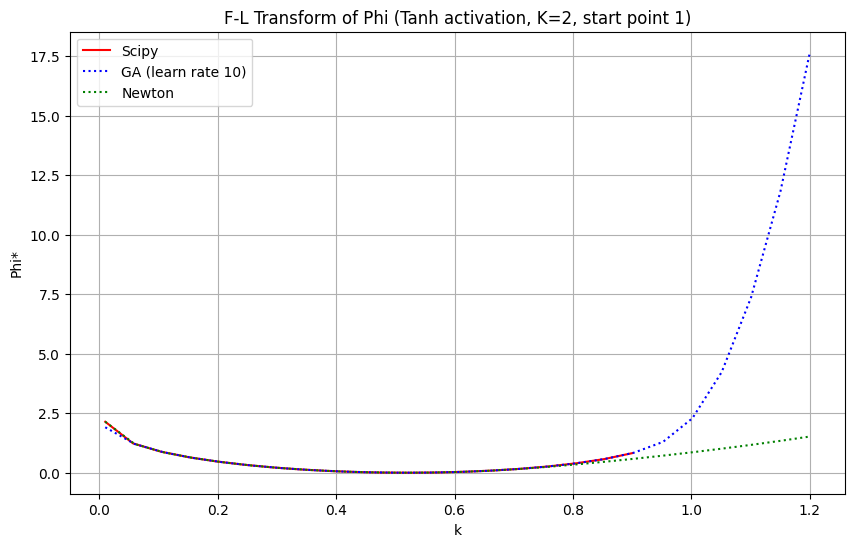

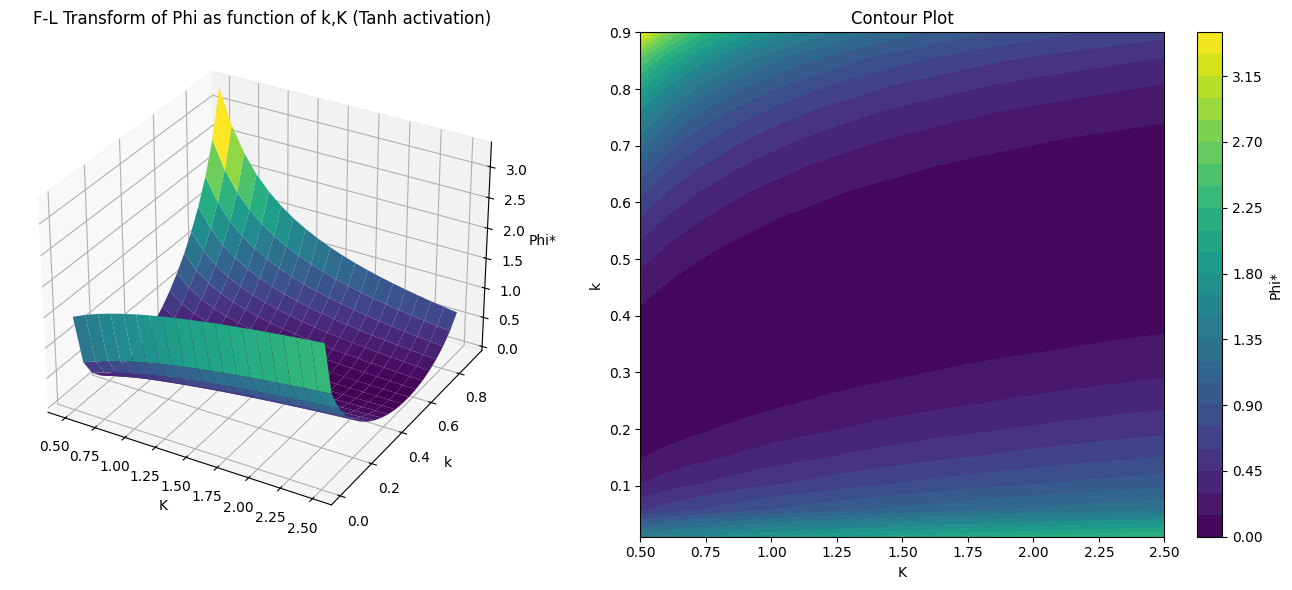

In [ ]:
# Plot Fenchel-Legendre transform of Phi computed with different methods
import matplotlib.pyplot as plt
import time as tm

# Range of k_1 values
k_1_values_scipy = np.linspace(0.01, 0.9, 20) # must be in (0.1, 0.9)
k_1_values = np.linspace(0.01, 1.2, 25)
# Range of k_0 values
k_0_values = np.linspace(0.5, 2.5, 20)
learn_rate = 10 # have to be large
start_point = 1

# Scipy optimization
start = tm.time()
Phi_conj_scipy = [Phi_conjugate_Scipy(k, 2, start_point)[0] for k in k_1_values_scipy]
end = tm.time()
print(f"Total runtime of Scipy is {end - start}")
# Gradient descent
start = tm.time()
Phi_conj_ga = [Phi_conjugate_GA(k, 2, learn_rate, start_point)[0] for k in k_1_values]
end = tm.time()
print(f"Total runtime of GA is {end - start}")
# Newton's method   
start = tm.time()
Phi_conj_newton = [Phi_conjugate_Newton(k, 2, start_point)[0] for k in k_1_values]
end = tm.time()
print(f"Total runtime of Newton is {end - start}\n")

# Plotting
plt.figure(figsize = (10, 6))
plt.plot(k_1_values_scipy, Phi_conj_scipy, label = 'Scipy', linestyle = '-', color = 'red')
plt.plot(k_1_values, Phi_conj_ga, label = f'GA (learn rate {learn_rate})', linestyle = ':', color = 'blue')
plt.plot(k_1_values, Phi_conj_newton, label = 'Newton', linestyle = ':',  color = 'green')
plt.title(f'F-L Transform of Phi (Tanh activation, K=2, start point {start_point})')
plt.xlabel('k')
plt.ylabel('Phi*')
plt.legend()
plt.grid()
#plt.savefig(f"FLtanh.pdf", format = "pdf")
plt.show()

# Grid points for 3D plot + contour plot
K0, K1 = np.meshgrid(k_0_values, k_1_values_scipy)
k_values = np.stack([K0.ravel(), K1.ravel()], axis=1)
# Scipy optimization
results = [Phi_conjugate_Scipy(k[1], k[0], start_point)[0] for k in k_values]
results = np.array(results).reshape(K0.shape)
# Plotting
fig = plt.figure(figsize = (14, 6))
# Plot 3D
ax1 = fig.add_subplot(1, 2, 1, projection = '3d')
ax1.plot_surface(K0, K1, results, cmap = 'viridis', edgecolor = 'none')
ax1.set_title(f"F-L Transform of Phi as function of k,K (Tanh activation)")
ax1.set_xlabel('K')
ax1.set_ylabel('k')
ax1.set_zlabel('Phi*')
# Contour plot
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contourf(K0, K1, results, levels = 30, cmap = 'viridis')
fig.colorbar(contour, ax = ax2, label = 'Phi*')
ax2.set_title(f"Contour Plot")
ax2.set_xlabel('K')
ax2.set_ylabel('k')
plt.tight_layout()
#plt.savefig(f"FLtanh3D.pdf", format = "pdf")
plt.show()

In [4]:
# We recursively compute the rate function I(k_output, k_input, layer) for a given layer
# recall that the recursive definition of the rate function is:
# I_K(k_output, k_input, layer) = min_{k_hidden_layer > 0} I(k_hidden_layer, k_input, layer - 1) + Phi_conjugate(k_output, k_hidden_layer)
# while for layer == 1, we have:
# I_K(k_output, k_input, 1) = Phi_conjugate(k_output, k_input)
# We actually define the function so that its output is a double (I_value, k_hidden_layer)
# where I_value is the value of the rate function and k_hidden_layer is the optimal value for the minmization problem

# Scipy optimization
def I_K_Scipy(k_output, k_input, layer, starting_point = 0.1):
    if layer == 1:
        # Base case ---> FL transform and the optimal point is just k_input
        return Phi_conjugate_Scipy(k_output, k_input)[0], k_input
    else:
        # define the target function for the current layer
        def objective(k_hidden_layer):   
            # Compute the legendre transform for the current layer
            Phi_conj_current, lam_current = Phi_conjugate_Scipy(k_output, k_hidden_layer)
            # Compute the value of the rate function for the past layer and obtain the past optimal k_hidden_layer
            I_prev, k_hidden_layer_prev = I_K_Scipy(k_hidden_layer, k_input, layer - 1, starting_point)
            # Compute the legendre transform for the previous layer (this is needed to compute the gradient)
            _, lam_prev = Phi_conjugate_Scipy(k_hidden_layer, k_hidden_layer_prev)
            # Define the value and its derivative
            value = I_prev + Phi_conj_current
            gradient = - gradient_Phi_k(lam_current, k_hidden_layer) + lam_prev
            return value, gradient
        # Use Scipy's minimize to find the optimal k_hidden_layer
        result = minimize(objective, x0 = starting_point, method = 'L-BFGS-B', jac = True, bounds = ((0.001, 0.9),), options = {'disp': False})
        if not result.success:
            raise ValueError("Optimization failed: " + result.message)
        return result.fun, result.x[0]

# Gradient Descent
def I_K_GD(k_output, k_input, layer, learning_rate = 0.01, starting_point = 0.1, num_iterations = 30):
    if layer == 1:
        return Phi_conjugate_GA(k_output, k_input)[0], k_input
    else:
        k_hidden_layer = starting_point
        for _ in range(num_iterations):
            _, lam_current = Phi_conjugate_GA(k_output, k_hidden_layer)
            _, k_hidden_layer_prev = I_K_GD(k_hidden_layer, k_input, layer - 1, learning_rate, starting_point, num_iterations)
            _, lam_prev = Phi_conjugate_GA(k_hidden_layer, k_hidden_layer_prev)
            grad = - gradient_Phi_k(lam_current, k_hidden_layer) + lam_prev
            k_updated = k_hidden_layer - learning_rate * grad
            if k_updated > 0.9:
                # max possible step
                k_hidden_layer = 0.9
            elif k_updated < 0:
                # min possible step
                k_hidden_layer = 0.001
            else:
                k_hidden_layer = k_updated
    I_k = Phi_conjugate_GA(k_output, k_hidden_layer)[0] + I_K_GD(k_hidden_layer, k_input, layer - 1, learning_rate, starting_point, num_iterations)[0]
    return I_k, k_hidden_layer

# Test the functions
import time as tm
k_output = 0.5  # must be in (0.01, 0.7) for Scipy, must be in (0.01, 3.3) for GD
k_input = 2
layer = 2
learn_rate = 0.01 # have to be small
start_point = 0.1
# Scipy optimization
start = tm.time()
I_K_scipy, k_opt_scipy = I_K_Scipy(k_output, k_input, layer, start_point)
end = tm.time()
print(f"Rate Function I_K for Linear Activation at Layer {layer + 1}: {I_K_scipy}, minimized at {k_opt_scipy}, total runtime {end - start} (Scipy)")
# Gradient Descent
start = tm.time()
I_K_gd, k_opt_gd = I_K_GD(k_output, k_input, layer, learn_rate, start_point)
end = tm.time()
print(f"Rate Function I_K for Linear Activation at Layer {layer + 1}: {I_K_gd}, minimized at {k_opt_gd}, total runtime {end - start} (GD)")

C:\Users\User\AppData\Local\Temp\ipykernel_23320\1796373318.py:12: RuntimeWarning: overflow encountered in square
  return 1 / np.cosh(x)**2  # derivative of tanh function
C:\Users\User\AppData\Local\Temp\ipykernel_23320\1796373318.py:12: RuntimeWarning: overflow encountered in cosh
  return 1 / np.cosh(x)**2  # derivative of tanh function


Rate Function I_K for Linear Activation at Layer 3: 0.2617144923556099, minimized at 0.6134271390886985, total runtime 2.4154117107391357 (Scipy)


C:\Users\User\AppData\Local\Temp\ipykernel_23320\1796373318.py:12: RuntimeWarning: overflow encountered in scalar power
  return 1 / np.cosh(x)**2  # derivative of tanh function


Rate Function I_K for Linear Activation at Layer 3: 0.26172493514311873, minimized at 0.6121304576515223, total runtime 11.815587759017944 (GD)


C:\Users\User\AppData\Local\Temp\ipykernel_30860\1796373318.py:12: RuntimeWarning: overflow encountered in square
  return 1 / np.cosh(x)**2  # derivative of tanh function
C:\Users\User\AppData\Local\Temp\ipykernel_30860\1796373318.py:12: RuntimeWarning: overflow encountered in cosh
  return 1 / np.cosh(x)**2  # derivative of tanh function


Total runtime of Scipy is 23.284542560577393


C:\Users\User\AppData\Local\Temp\ipykernel_30860\1796373318.py:12: RuntimeWarning: overflow encountered in scalar power
  return 1 / np.cosh(x)**2  # derivative of tanh function


Total runtime of GD is 197.79187393188477



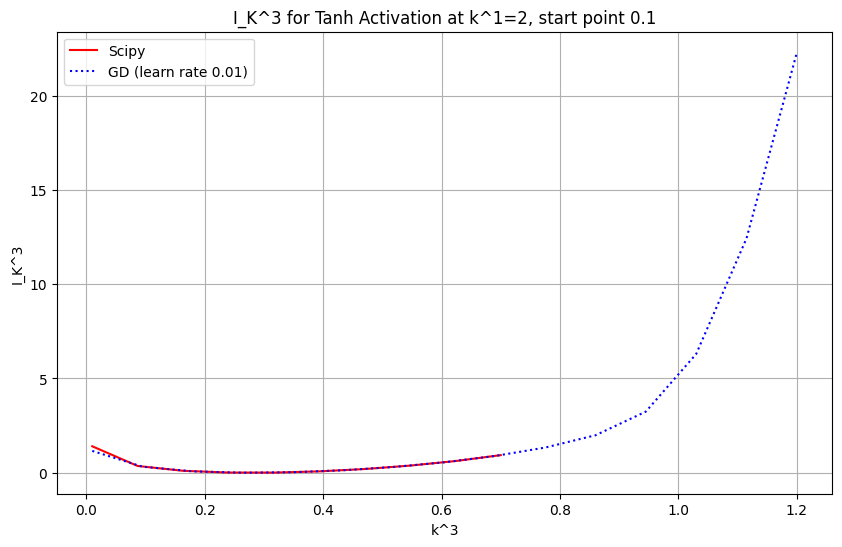

In [ ]:
# Plot I_K computed with different methods
import matplotlib.pyplot as plt
import time as tm

# Range of k values
k_values_scipy = np.linspace(0.01, 0.7, 10) # must be in (0.01, 0.7) for Scipy
k_values_gd = np.linspace(0.01, 1.2, 15) # must be in (0.01, 3.3) for GD
k_input = 2
layer = 2
learn_rate = 0.01 # have to be small
start_point = 0.1

# Scipy optimization
start = tm.time()
results_scipy = [I_K_Scipy(k_output, k_input, layer)[0] for k_output in k_values_scipy]
end = tm.time()
print(f"Total runtime of Scipy is {end - start}")
# Gradient Descent
start = tm.time()
results_gd = [I_K_GD(k_output, k_input, layer, learn_rate, start_point)[0] for k_output in k_values_gd]
end = tm.time()
print(f"Total runtime of GD is {end - start}\n")

# Plotting
plt.figure(figsize = (10, 6))
plt.plot(k_values_scipy, results_scipy, label = 'Scipy', linestyle = '-', color = 'red')
plt.plot(k_values_gd, results_gd, label = f'GD (learn rate {learn_rate})', linestyle = ':', color = 'blue')
plt.title(f"I_K^{layer+1} for Tanh Activation at k^1={k_input}, start point {start_point}")
plt.xlabel(f'k^{layer+1}')
plt.ylabel(f'I_K^{layer+1}')
plt.grid()
plt.legend()
#plt.savefig(f"I_K{layer+1}tanh.pdf", format = "pdf")
plt.show()

In [5]:
# Finally we want to calculate the rate funtion I_F for the output of the neural network
# All the functions return the value of the function and the optimal point
from numpy import linalg as la
        
# Scipy optimization
def I_F_Scipy(y, k_input, layer, starting_point = 0.1):
    def objective(k_last_layer):
        # Compute I_K for the last layer and the optimal k (related at the previous layer)
        I_K_value, k_hidden_layer = I_K_Scipy(k_last_layer, k_input, layer)
        # The derivative of I_K is the previous optimal lambda for Phi_conjugate
        _, lam = Phi_conjugate_Scipy(k_last_layer, k_hidden_layer)
        # Define the value and its derivative
        value = I_K_value + la.norm(y)**2 / (2 * k_last_layer)
        gradient = lam - la.norm(y)**2 / (2 * k_last_layer**2)
        return value, gradient
    # Use Scipy's minimize to find the optimal k_last_layer
    result = minimize(objective, x0 = starting_point, method = 'L-BFGS-B', jac = True, bounds = ((0.001, 0.7),), options = {'disp': False})
    if not result.success:
        raise ValueError("Optimization failed: " + result.message)
    return result.fun, result.x[0]

# Gradient Descent
def I_F_GD(y, k_input, layer, learning_rate = 0.001, starting_point = 0.1, num_iterations = 30):
    k_last_layer = starting_point
    for _ in range(num_iterations):
        _, k_hidden_layer = I_K_GD(k_last_layer, k_input, layer)
        _, lam = Phi_conjugate_GA(k_last_layer, k_hidden_layer)
        grad = lam - la.norm(y)**2 / (2 * k_last_layer**2)
        k_updated = k_last_layer - learning_rate * grad
        if k_updated > 3:
            # max possible step
            k_last_layer = 3
        elif k_updated < 0:
            # min possible step
            k_last_layer = 0.001
        else:
            k_last_layer = k_updated
    I_F = I_K_GD(k_last_layer, k_input, layer)[0] + la.norm(y)**2 / (2 * k_last_layer)
    return I_F, k_last_layer

# Test the functions
import time as tm
y = 10 #= np.arange(9) - 4
k_input = 2
layer = 1
learn_rate = 0.001 # have to be very small
start_point = 0.1
# Scipy optimization
start = tm.time()
I_F_scipy, k_opt_scipy = I_F_Scipy(y, k_input, layer, start_point)
end = tm.time()
print(f"Rate Function I_F for Tanh activation at Layer {layer + 1}: {I_F_scipy}, minimized at {k_opt_scipy}, total runtime {end - start} (Scipy)")
# Gradient Descent
start = tm.time()
I_F_gd, k_opt_gd = I_F_GD(y, k_input, layer, learn_rate, start_point)
end = tm.time()
print(f"Rate Function I_F for Tanh activation at Layer {layer + 1}: {I_F_gd}, minimized at {k_opt_gd}, total runtime {end - start} (GD)")

Rate Function I_F for Tanh activation at Layer 2: 71.5729918978894, minimized at 0.7, total runtime 0.3777883052825928 (Scipy)
Rate Function I_F for Tanh activation at Layer 2: 52.428599465069766, minimized at 1.0894532514145079, total runtime 10.705252170562744 (GD)


Total runtime of Scipy is 5.893841981887817
Total runtime of GD is 149.23630046844482



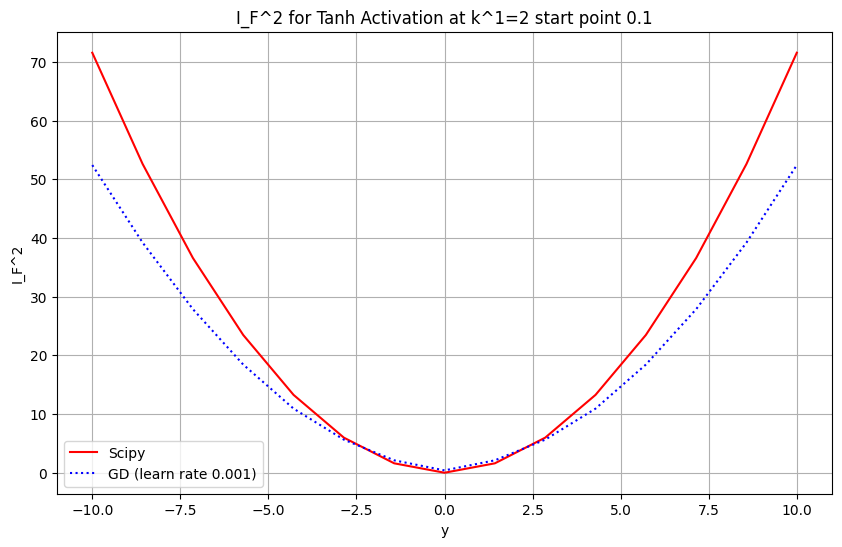

In [23]:
# Plot I_F output dimension = 1
import time as tm

# Range of x values
y_values = np.linspace(-10, 10, 15)
k_input = 2
layer = 1
learn_rate = 0.001
start_point = 0.1

# Scipy optimization
start = tm.time()
results_scipy = [I_F_Scipy(y, k_input, layer, start_point)[0] for y in y_values]
end = tm.time()
print(f"Total runtime of Scipy is {end - start}")
# Gradient Descent
start = tm.time()
results_gd = [I_F_GD(y, k_input, layer, learn_rate, start_point)[0] for y in y_values]
end = tm.time()
print(f"Total runtime of GD is {end - start}\n")

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
plt.plot(y_values, results_scipy, label = 'Scipy', linestyle = '-', color = 'red')
plt.plot(y_values, results_gd, label = f'GD (learn rate {learn_rate})', linestyle = ':',  color = 'blue')
plt.title(f"I_F^{layer+1} for Tanh Activation at k^1={k_input} start point {start_point}")
plt.xlabel('y')
plt.ylabel(f'I_F^{layer+1}')
plt.grid()
plt.legend()
plt.savefig(f"I_F{layer+1}tanh.pdf", format = "pdf")
plt.show()

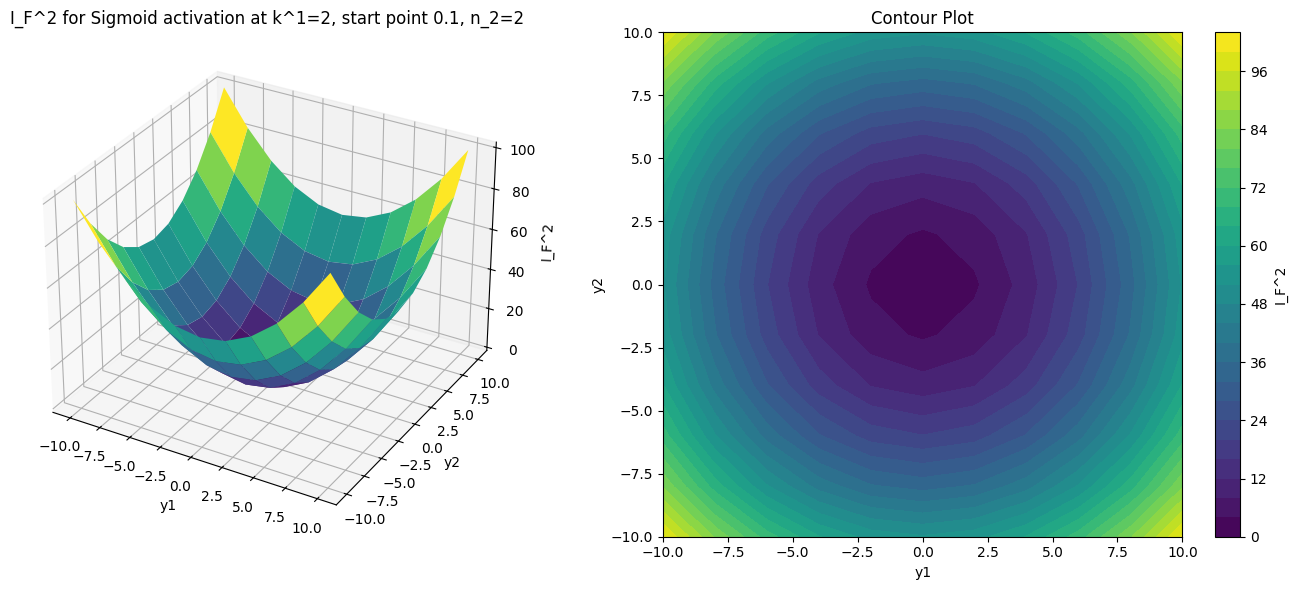

In [24]:
# Plot I_F output dimension = 2
import numpy as np

# Range of x values
y1_range = np.linspace(-10, 10, 11)
y2_range = np.linspace(-10, 10, 11)
# Grid points
Y1, Y2 = np.meshgrid(y1_range, y2_range)
y_values = np.stack([Y1.ravel(), Y2.ravel()], axis = 1)
k_input = 2
layer = 1
learn_rate = 0.001
start_point = 0.1

# GD
results = [I_F_GD(y, k_input, layer, learn_rate, start_point)[0] for y in y_values]
results = np.array(results).reshape(Y1.shape)

# Plotting
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (14, 6))
# Plot 3D
ax1 = fig.add_subplot(1, 2, 1, projection = '3d')
ax1.plot_surface(Y1, Y2, results, cmap = 'viridis', edgecolor = 'none')
ax1.set_title(f"I_F^{layer+1} for Sigmoid activation at k^1={k_input}, start point {start_point}, n_{layer+1}=2")
ax1.set_xlabel('y1')
ax1.set_ylabel('y2')
ax1.set_zlabel(f'I_F^{layer+1}')
# Contour plot
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contourf(X1, X2, results, levels = 30, cmap = 'viridis')
fig.colorbar(contour, ax = ax2, label = f'I_F^{layer+1}')
ax2.set_title(f"Contour Plot")
ax2.set_xlabel('y1')
ax2.set_ylabel('y2')
plt.tight_layout()
plt.savefig(f"I_F{layer+1}tanh3D.pdf", format = "pdf")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_23320\1796373318.py:12: RuntimeWarning: overflow encountered in scalar power
  return 1 / np.cosh(x)**2  # derivative of tanh function
C:\Users\User\AppData\Local\Temp\ipykernel_23320\1796373318.py:12: RuntimeWarning: overflow encountered in cosh
  return 1 / np.cosh(x)**2  # derivative of tanh function


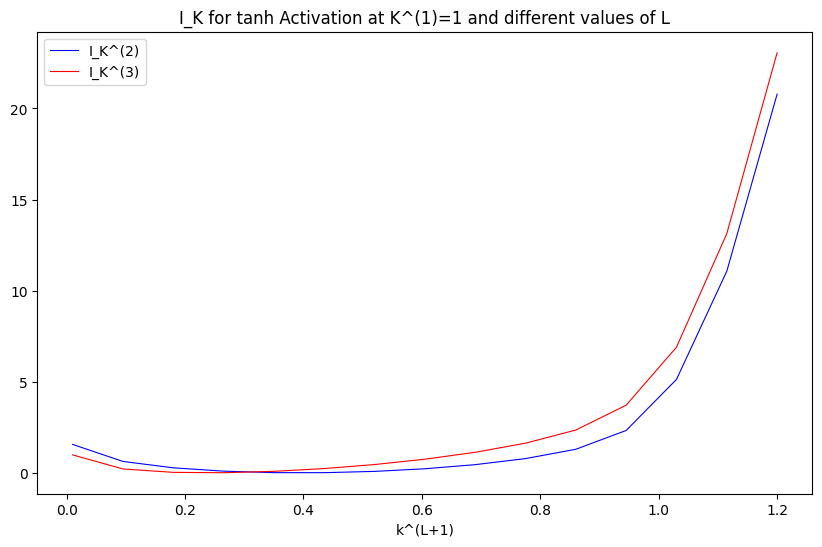

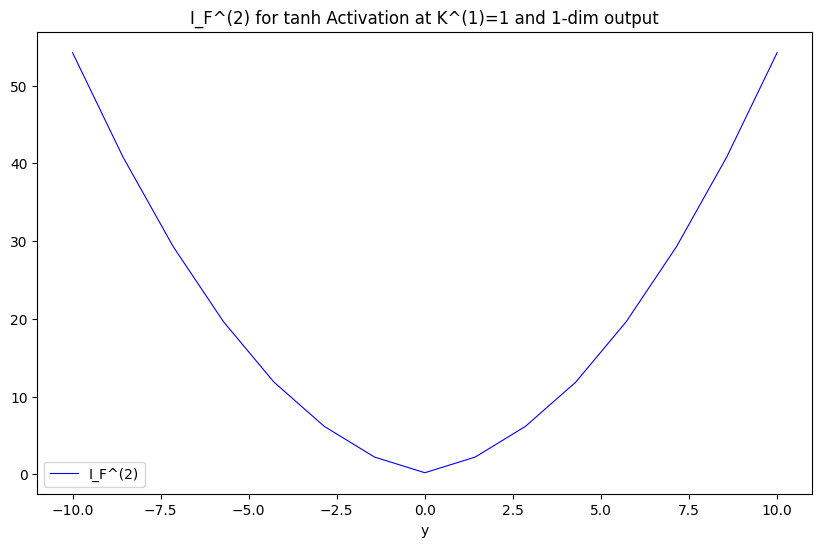

In [8]:
# Range of k values
k_values = np.linspace(0.01, 1.2, 15)
k_input = 1
# Scipy optimization for I_K   
results_2 = [Phi_conjugate_GA(k, k_input)[0] for k in k_values]
results_3 = [I_K_GD(k_output, k_input, 2)[0] for k_output in k_values]
# Plotting
plt.figure(figsize = (10, 6))
plt.plot(k_values, results_2, label = 'I_K^(2)', linestyle = '-', color = 'blue', linewidth = 0.8)
plt.plot(k_values, results_3, label = 'I_K^(3)', linestyle = '-',  color = 'red', linewidth = 0.8)
plt.title(f"I_K for tanh Activation at K^(1)={k_input} and different values of L")
plt.xlabel(f'k^(L+1)')
plt.legend()
plt.savefig(f"I_Ktanhslide.pdf", format = "pdf")
plt.show()

# Range of y values
y_values = np.linspace(-10, 10, 15)
k_input = 1
    # Analytic solution
results_2 = [I_F_GD(y, k_input, 1)[0] for y in y_values]
# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
plt.plot(y_values, results_2, label = 'I_F^(2)', linestyle = '-', color = 'blue', linewidth = 0.8)
plt.title(f"I_F^(2) for tanh Activation at K^(1)={k_input} and 1-dim output")
plt.xlabel('y')
plt.legend()
plt.savefig(f"I_Ftanhslide.pdf", format = "pdf")
plt.show()